In [95]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [96]:
salariespoints_df = pd.read_csv("/Users/Edward_Fujiwara/Desktop/NBA_Salr_Bask/nbasalariespoints.csv")

In [97]:
Newdf = salariespoints_df[["Player","FG","FGA","3P","2P","FT","FTA","ORB","DRB","AST","STL","BLK","TOV","PF","SALARY"]]

In [98]:
Newdf = Newdf.dropna()

In [99]:
Newdf["SALARY"] = Newdf["SALARY"].str.replace('$', '')

In [100]:
Newdf["SALARY"] = Newdf["SALARY"].str.replace(',', '')

In [101]:
Newdf["PTS"] = (3*Newdf["3P"] + 2*Newdf["2P"] + Newdf["FT"])

In [102]:
Newdf["PSI"] = Newdf["PTS"] + 0.7*Newdf["FG"] - 0.3*Newdf["FGA"] - (Newdf["FTA"]-Newdf["FT"]) + 0.6*Newdf["ORB"] + 0.3*Newdf["DRB"] + Newdf["STL"] + 0.5*Newdf["AST"] + 0.3*Newdf["BLK"] - 0.4*Newdf["PF"] - 1.2*Newdf["TOV"]

In [103]:
Newdf["SIM"] = (pd.to_numeric(Newdf["SALARY"]))*0.000001

In [104]:
Newdf

,Player,FG,FGA,3P,2P,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,SALARY,PTS,PSI,SIM
0,Stephen Curry,10.2,20.2,5.1,5.1,4.6,5.1,0.9,4.6,6.7,2.1,0.2,3.3,2.0,11370786,30.1,33.35,11.370786
1,James Harden,8.7,19.7,2.9,5.8,8.8,10.2,0.8,5.3,7.5,1.7,0.6,4.6,2.8,15756438,29.1,28.94,15.756438
2,Kevin Durant,9.7,19.2,2.6,7.1,6.2,6.9,0.6,7.6,5.0,1.0,1.2,3.5,1.9,20158622,28.2,30.07,20.158622
3,DeMarcus Cousins,9.2,20.5,1.1,8.2,7.3,10.2,2.4,9.1,3.3,1.6,1.4,3.8,3.6,15851950,27.0,26.23,15.851950
4,LeBron James,9.7,18.6,1.1,8.6,4.7,6.5,1.5,6.0,6.8,1.4,0.6,3.3,1.9,22970500,25.2,27.57,22.970500
5,Damian Lillard,8.2,19.7,3.1,5.2,5.5,6.2,0.6,3.4,6.8,0.9,0.4,3.2,2.2,4236287,25.2,25.41,4.236287
6,Anthony Davis,9.2,18.6,0.6,8.6,5.3,7.0,2.1,8.1,1.9,1.3,2.0,2.0,2.4,7070730,24.3,26.64,7.070730
7,DeMar DeRozan,7.9,17.7,0.6,7.3,7.1,8.4,0.8,3.7,4.0,1.0,0.3,2.2,2.1,10050000,23.5,23.62,10.050000
8,Russell Westbrook,8.2,18.1,1.3,6.9,5.8,7.2,1.8,6.0,10.4,2.0,0.3,4.3,2.5,16744218,23.5,26.42,16.744218
9,Paul George,7.5,17.9,2.6,4.9,5.6,6.5,1.0,6.0,4.1,1.9,0.4,3.3,2.8,17120106,23.2,23.57,17.120106


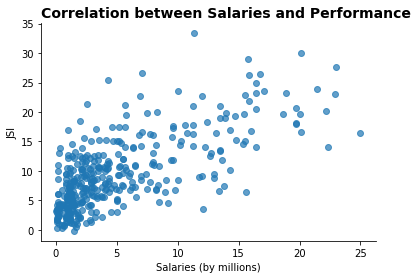

In [105]:
fig, ax = plt.subplots() 

ax.scatter(SIM, Newdf["PSI"], 
            alpha= 0.70) 

ax.set_title('Correlation between Salaries and Performance', loc='left', fontsize=14, fontweight = "bold") 

ax.set_xlabel("Salaries (by millions)")
ax.set_ylabel("JSI")

ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 

plt.show()

In [106]:
Newdf.sort_values(by=['PSI'])

,Player,FG,FGA,3P,2P,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,SALARY,PTS,PSI,SIM
472,Bruno Caboclo,0.2,2.0,0.2,0.0,0.0,0.0,0.2,0.2,0.2,0.3,0.2,0.7,0.3,1524000,0.6,-0.18,1.524000
460,Keith Appling,0.4,1.6,0.0,0.4,0.4,0.4,0.0,0.2,0.2,0.2,0.0,0.6,1.0,61776,1.2,0.24,0.061776
468,Aaron Harrison,0.2,0.9,0.1,0.1,0.2,0.6,0.2,0.5,0.1,0.3,0.0,0.2,0.5,525093,0.7,0.35,0.525093
473,Sam Dekker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,1646400,0.0,0.39,1.646400
463,Bryce Cotton,0.5,1.3,0.0,0.5,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.6,0.3,700902,1.0,0.72,0.700902
461,Luis Montero,0.4,1.6,0.1,0.3,0.3,0.3,0.0,0.3,0.1,0.0,0.0,0.3,0.1,525093,1.2,0.74,0.525093
462,Pat Connaughton,0.4,1.4,0.1,0.2,0.1,0.1,0.3,0.6,0.3,0.1,0.0,0.3,0.2,625093,0.8,0.83,0.625093
449,Nazr Mohammed,0.6,1.0,0.0,0.6,0.4,0.4,0.2,0.6,0.0,0.0,0.0,0.6,0.8,222888,1.6,0.98,0.222888
466,James Young,0.4,1.2,0.2,0.2,0.0,0.1,0.1,0.8,0.3,0.2,0.0,0.2,0.6,1749840,1.0,0.99,1.749840
457,Mitch McGary,0.6,1.2,0.0,0.6,0.2,0.5,0.2,0.7,0.2,0.1,0.1,0.4,0.5,1463040,1.4,1.04,1.463040
